In [9]:
import pandas
import numpy
import math

import matplotlib
from matplotlib import pyplot

import seaborn

from scipy.stats import mode
from sklearn.linear_model import LinearRegression

from sklearn import metrics

%matplotlib inline

In [10]:
#load csv
insurance_data_frame = pandas.read_csv('data/insurance.csv')

In [11]:
insurance_data_frame.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


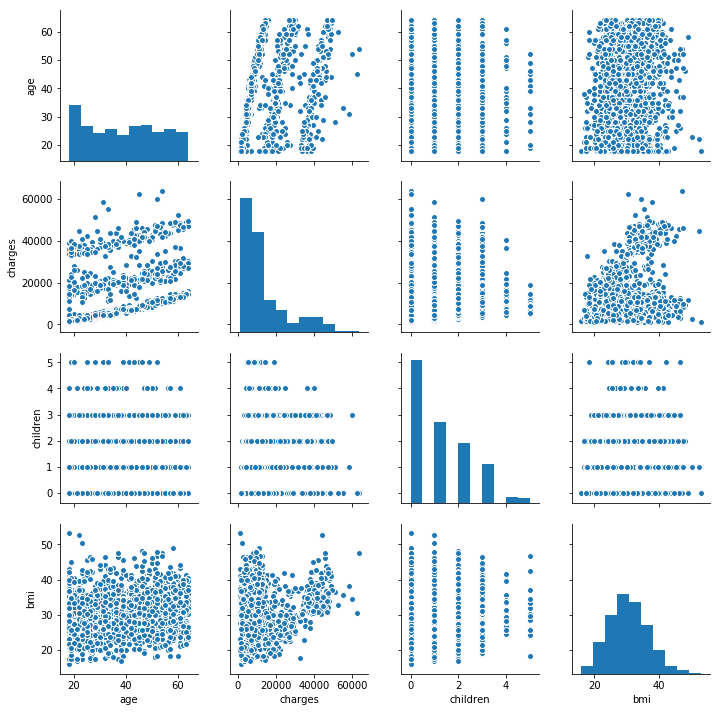

In [12]:
#visualizing and understanding data
seaborn.pairplot(data=insurance_data_frame[['age', 'charges', 'children', 'bmi']]) 

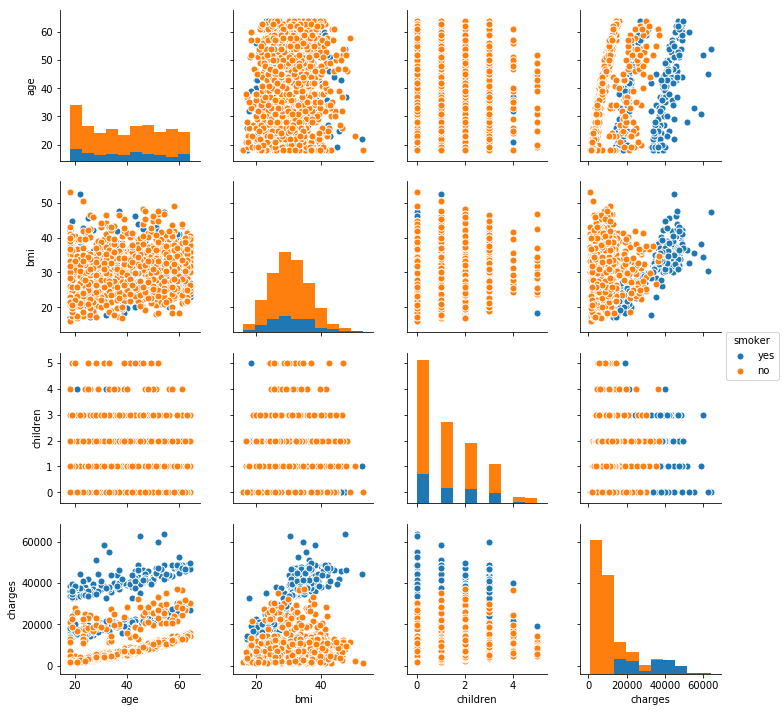

In [13]:
seaborn.pairplot(data=insurance_data_frame, hue='smoker', plot_kws={"s": 50})

In [17]:
#data transformation
transformed_insurance_data_frame = insurance_data_frame.copy(deep=True)
transformed_insurance_data_frame['is_male'] = transformed_insurance_data_frame['sex'].apply(
    lambda value: 1 if value == 'male' else 0)
transformed_insurance_data_frame['is_smoker'] = transformed_insurance_data_frame['smoker'].apply(
    lambda value: 1 if value == 'yes' else 0)
transformed_insurance_data_frame = pandas.get_dummies(transformed_insurance_data_frame,\
    columns=["region"])
transformed_insurance_data_frame['charges'] = transformed_insurance_data_frame['charges'].divide(1000)

transformed_insurance_data_frame.head()

,age,sex,bmi,children,smoker,charges,is_male,is_smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16.884924,0,1,0,0,0,1
1,18,male,33.770,1,no,1.725552,1,0,0,0,1,0
2,28,male,33.000,3,no,4.449462,1,0,0,0,1,0
3,33,male,22.705,0,no,21.984471,1,0,0,1,0,0
4,32,male,28.880,0,no,3.866855,1,0,0,1,0,0


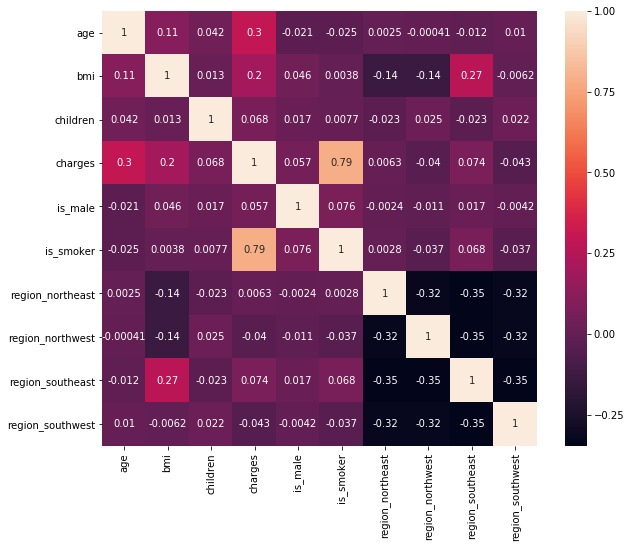

In [61]:
f,ax = pyplot.subplots(figsize=(10, 8))
seaborn.heatmap(transformed_insurance_data_frame.corr(), annot=True, square=True, ax=ax)

In [62]:
#building training set
train_data_frame = transformed_insurance_data_frame.drop(columns=['sex', 'smoker'])
test_data_frame = train_data_frame.sample(frac=0.25)
train_data_frame = train_data_frame.loc[~(train_data_frame.index.isin(test_data_frame.index))]

train_input = train_data_frame.drop(columns=['charges']).values
train_output = train_data_frame['charges'].values

test_input = test_data_frame.drop(columns=['charges']).values
test_output = test_data_frame['charges'].values

In [63]:
#training a model
linear_model = LinearRegression()
linear_model.fit(train_input, train_output.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
output_prediction = linear_model.predict(train_input)

In [65]:
output_prediction[:5]

array([[25.25612135],
       [ 6.34642772],
       [ 5.59174584],
       [ 3.76103796],
       [10.74595211]])

In [66]:
prediction_list = output_prediction.reshape(-1,)
prediction_list[:5]

array([25.25612135,  6.34642772,  5.59174584,  3.76103796, 10.74595211])

In [67]:
train_input[:5]

array([[19.  , 27.9 ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ],
       [28.  , 33.  ,  3.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ],
       [32.  , 28.88,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ],
       [31.  , 25.74,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ],
       [46.  , 33.44,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ]])

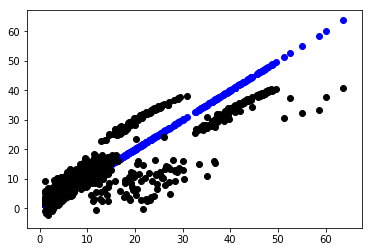

In [74]:
#visualizing results
pyplot.scatter(train_data_frame['charges'], train_output,\
    color='blue')
pyplot.scatter(train_data_frame['charges'], prediction_list,\
    color='black')

In [75]:
test_output_prediction = linear_model.predict(test_input)
test_prediction_list = test_output_prediction.reshape(-1,)

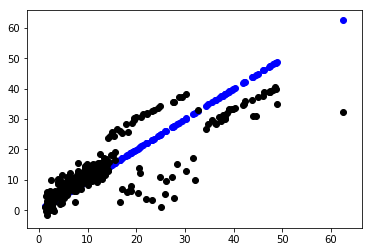

In [76]:
#visualizing results
pyplot.scatter(test_data_frame['charges'], test_output,\
    color='blue')
pyplot.scatter(test_data_frame['charges'], test_prediction_list,\
    color='black')

In [69]:
# error for mean line
metrics.mean_squared_error(train_output, numpy.full((len(train_output)), train_output.mean()))

146.6817266124663

In [70]:
#train error
metrics.mean_squared_error(train_output, prediction_list)

36.52390993314099

In [71]:
#test error
metrics.mean_squared_error(test_output, test_prediction_list)

36.59188295704909

In [55]:
# The coefficients

print(linear_model.coef_)
print(linear_model.intercept_)

[[ 0.25685635  0.33919345  0.47550055 -0.13131436 23.84853454  0.58700924
   0.23404534 -0.44801281 -0.37304176]]
[-12.52554781]


In [ ]:
'''
resources:

http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
https://www.kaggle.com/mirichoi0218/insurance
'''

    